In [39]:
import os
import pandas as pd

current_dir = os.getcwd()
path_file = os.path.join(current_dir, "datasets/diabetes.csv")
df = pd.read_csv(path_file, header=0)

In [40]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [42]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [43]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [44]:
print('Numbers of rows with 0 values for each variable')
for col in df.columns:
    missing_rows = df.loc[df[col] == 0].shape[0]
    print(col + ': ' + str(missing_rows))

Numbers of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [45]:
# Padronização dos dados
import numpy as np

df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

print('Numbers of rows with 0 values for each variable')
for col in df.columns:
    missing_rows = df.loc[df[col] == 0].shape[0]
    print(col + ': ' + str(missing_rows))

Numbers of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [46]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

# print('Numbers of rows with 0 values for each variable')
# for col in df.columns:
#     missing_rows = df.loc[df[col] == 0].shape[0]
#     print(col + ': ' + str(missing_rows))

In [47]:
from sklearn import preprocessing

df_scaled = preprocessing.scale(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# print('Numbers of rows with 0 values for each variable')
# for col in df_scaled.columns:
#     missing_rows = df_scaled.loc[df_scaled[col] == 0].shape[0]
#     print(col + ': ' + str(missing_rows))

In [48]:
df_scaled['Outcome'] = df['Outcome']
df = df_scaled
df.describe().loc[['mean', 'std', 'max', 'min'],].round(2).abs()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.35
std,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.48
max,3.91,2.54,4.1,7.95,8.13,5.04,5.88,4.06,1.00
min,1.14,2.55,4.0,2.52,1.67,2.08,1.19,1.04,0.00


In [49]:
# print('Numbers of rows with 0 values for each variable')
# for col in df.columns:
#     missing_rows = df.loc[df[col] == 0].shape[0]
#     print(col + ': ' + str(missing_rows))

In [50]:
X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

In [52]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential()
# model.add(Input(shape=(8,)))
model.add(Dense(32, activation='relu', input_dim=8))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/home/caio/anaconda3/envs/ds/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
from sklearn import preprocessing

history = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val))

Epoch 1/200


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6235 - loss: 0.6434 - val_accuracy: 0.6667 - val_loss: 0.6143
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6813 - loss: 0.6015 - val_accuracy: 0.6992 - val_loss: 0.5870
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6877 - loss: 0.5722 - val_accuracy: 0.6667 - val_loss: 0.5669
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7200 - loss: 0.5452 - val_accuracy: 0.7073 - val_loss: 0.5522
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7547 - loss: 0.5066 - val_accuracy: 0.7236 - val_loss: 0.5414
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7825 - loss: 0.4722 - val_accuracy: 0.7317 - val_loss: 0.5322
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7677 - loss: 0.4830 - val_accuracy: 0.7317 - val_loss: 0.5275
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7783 - loss: 0.4846 - val_accuracy: 0.7317 - val_loss: 0.

In [54]:
scores = model.evaluate(X_train, y_train)
print('Training Accuracy: %.2f%%\n' % (scores[1]*100))

scores = model.evaluate(X_val, y_val)
print('Validation Accuracy: %.2f%%\n' % (scores[1]*100))

scores = model.evaluate(X_test, y_test)
print('Testing Accuracy: %.2f%%\n' % (scores[1]*100))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9238 - loss: 0.1842 
Training Accuracy: 93.08%

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7474 - loss: 0.7778
Validation Accuracy: 69.92%

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7572 - loss: 0.5663 
Testing Accuracy: 75.97%



In [55]:
y_test_pred = model.predict(X_test)

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7d945fe79160> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Text(0, 0.5, 'True Positive Rate')

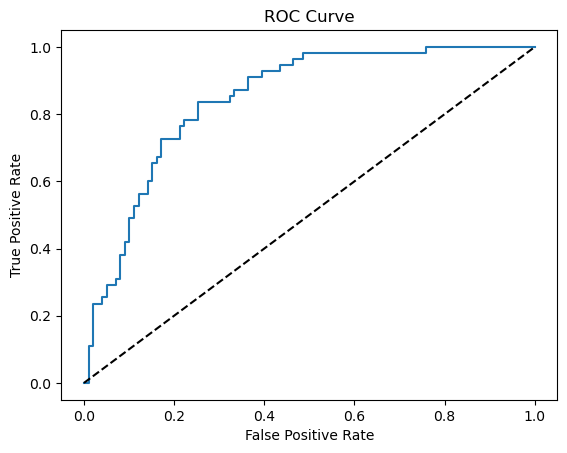

In [56]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

FPR, TPR, _ = roc_curve(y_test, y_test_pred)
plt.plot(FPR, TPR)
plt.plot([0, 1], [0, 1], '--', color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')